<a href="https://colab.research.google.com/github/xFlodz/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%962%20%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D1%85%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85%20%D1%81%D0%B5%D1%82%D0%B5%D0%B9%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8%20%D0%B8%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [16]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### 1.2. Проектируем архитектуру для этой задачи

In [17]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential


model = Sequential([
    Dense(16, input_shape=(13,), activation="relu"),
    Dropout(0.3),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [18]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### 1.4. Обучаем модель ИНС

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
result = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 305.9748 - mae: 14.7865 - val_loss: 46.7103 - val_mae: 5.3035
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 83.2804 - mae: 6.6864 - val_loss: 35.1404 - val_mae: 3.9943
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 56.2719 - mae: 5.6118 - val_loss: 36.3117 - val_mae: 3.8484
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41.2505 - mae: 4.8671 - val_loss: 54.2593 - val_mae: 5.7215
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 43.3689 - mae: 4.7739 - val_loss: 36.6025 - val_mae: 4.0051
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 39.8854 - mae: 4.6669 - val_loss: 26.8186 - val_mae: 3.3483
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.3029 - mae: 4.4030 - val_loss: 24.1821 - val_mae: 3.2433
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33.0551 - mae: 4.1929 - val_loss: 30.7787 - val_mae: 3.4789
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━

#### 1.6. Делаем предсказания на тестовых данных

In [21]:
predicts = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [22]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predicts, y_test)

3.098522932389203

In [23]:
print(result.history['loss'])

[196.25616455078125, 76.0013427734375, 56.19229507446289, 46.92710494995117, 43.05841827392578, 37.20661926269531, 36.99306106567383, 35.33927917480469, 29.815725326538086, 31.76519012451172, 31.72560691833496, 23.626962661743164, 29.937274932861328, 26.393842697143555, 26.11310386657715, 27.92460823059082, 29.230865478515625, 27.445205688476562, 24.925628662109375, 26.491636276245117, 23.06515884399414, 23.402353286743164, 20.958133697509766, 21.83045768737793, 20.693878173828125, 25.263181686401367, 18.715545654296875, 19.962400436401367, 19.011720657348633, 19.05799102783203, 19.47833824157715, 21.86387062072754, 24.021739959716797, 20.06227684020996, 17.90892791748047, 20.266246795654297, 19.574142456054688, 20.706192016601562, 19.29866600036621, 17.500057220458984, 19.649049758911133, 26.534372329711914, 21.246295928955078, 20.0519962310791, 19.018762588500977, 16.14749526977539, 17.797813415527344, 17.684371948242188, 16.204479217529297, 16.398746490478516, 17.502553939819336, 15

#### 1.8. Строим график обучения

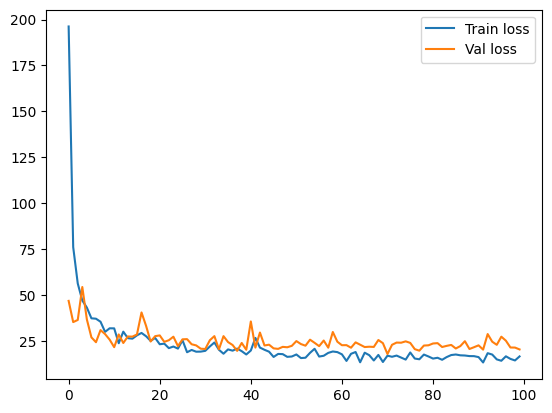

In [24]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'], label='Train loss')
plt.plot(result.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [25]:
def predicts(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat):

    input_data = np.array([[crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat]])
    input_data_scaled = scaler.transform(input_data)

    prediction = model.predict(input_data_scaled)

    return f"${prediction[0,0]:,.2f}"

In [26]:
!pip install gradio

In [27]:
import gradio as gr

interface = gr.Interface(
    fn=predicts,
    inputs=[
        gr.Slider(label="CRIM", minimum=0.006, maximum=89.000, step=0.1, value=0.02985),
        gr.Slider(label="ZN", minimum=0.0, maximum=100.0, step=1, value=0.0),
        gr.Slider(label="INDUS", minimum=0.4, maximum=28.0, step=0.1, value=2.180),
        gr.Slider(label="CHAS", minimum=0.0, maximum=1.0, step=0.1, value=0),
        gr.Slider(label="NOX", minimum=0.3, maximum=0.9, step=0.01, value=0.4580),
        gr.Slider(label="RM", minimum=3.6, maximum=8.8, step=0.1, value=6.4300),
        gr.Slider(label="AGE", minimum=2.9, maximum=100.0, step=0.1, value=58.70),
        gr.Slider(label="DIS", minimum=1.0, maximum=12.2, step=0.1, value=6.062),
        gr.Slider(label="RAD", minimum=1, maximum=24, step=1, value=3),
        gr.Slider(label="TAX", minimum=180, maximum=720, step=1, value=222.0),
        gr.Slider(label="PTRATIO", minimum=2, maximum=22, step=0.1, value=18.70),
        gr.Slider(label="B", minimum=0.3, maximum=397.0, step=0.1, value=394.12),
        gr.Slider(label="LSTAT", minimum=1.7, maximum=38.0, step=0.1, value=5.21),
    ],

    live=True,
    outputs=gr.Text(label="Результат модели"),
)

interface.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7e2736d9d56a6bb04e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [28]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. Указываем путь к набору данных:

In [30]:
%%capture
!unzip /content/drive/MyDrive/animals_new.zip -d animals_new

In [31]:
imagesPath = sorted(list(paths.list_images('/content/animals_new/raw-img')))
print(imagesPath)
random.shuffle(imagesPath)
print(imagesPath)

['/content/animals_new/raw-img/chicken/10.jpeg', '/content/animals_new/raw-img/chicken/100.jpeg', '/content/animals_new/raw-img/chicken/1000.jpeg', '/content/animals_new/raw-img/chicken/1001.jpeg', '/content/animals_new/raw-img/chicken/1010.jpeg', '/content/animals_new/raw-img/chicken/1013.jpeg', '/content/animals_new/raw-img/chicken/1016.jpeg', '/content/animals_new/raw-img/chicken/1017.jpeg', '/content/animals_new/raw-img/chicken/1018.jpeg', '/content/animals_new/raw-img/chicken/102.jpeg', '/content/animals_new/raw-img/chicken/1020.jpeg', '/content/animals_new/raw-img/chicken/1021.jpeg', '/content/animals_new/raw-img/chicken/1023.jpeg', '/content/animals_new/raw-img/chicken/1024.jpeg', '/content/animals_new/raw-img/chicken/1026.jpeg', '/content/animals_new/raw-img/chicken/1028.jpeg', '/content/animals_new/raw-img/chicken/103.jpeg', '/content/animals_new/raw-img/chicken/1030.jpeg', '/content/animals_new/raw-img/chicken/1031.jpeg', '/content/animals_new/raw-img/chicken/1032.jpeg', '/co

### 4. Загружаем набор данных и формируем общую выборку:

In [32]:
class_dict = {}

for imagePath in imagesPath:
    label = imagePath.split(os.path.sep)[-2]
    if label not in class_dict:
        class_dict[label] = []
    class_dict[label].append(imagePath)

balanced_images = []
for label, images in class_dict.items():
    balanced_images.extend(images[:1000])

data, labels_str = [], []

for imagePath in balanced_images:
    try:
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (64, 64)).flatten()
        data.append(image)
        label = imagePath.split(os.path.sep)[-2]
        labels_str.append(label)
    except:
        continue

In [33]:
unique_labels = np.unique(labels_str)                  # Список уникальных строк
label_map = {lbl: idx for idx, lbl in enumerate(unique_labels)}
labels_int = np.array([label_map[lbl] for lbl in labels_str], dtype="int")

unique_labels, label_map, labels_int

(array(['chicken', 'cow', 'dog', 'elephant'], dtype='<U8'),
 {'chicken': 0, 'cow': 1, 'dog': 2, 'elephant': 3},
 array([0, 0, 0, ..., 3, 3, 3]))

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [34]:
data = np.array(data, dtype="float") / 255.0

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [35]:
from tensorflow.keras.utils import to_categorical

(X_train, X_test, trainY_int, testY_int) = train_test_split(data, labels_int, test_size=0.25, random_state=52)

trainY = to_categorical(trainY_int, num_classes=len(unique_labels))
testY = to_categorical(testY_int, num_classes=len(unique_labels))

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [53]:
model = Sequential()
model.add(Dense(1024, input_shape=(12288,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(len(unique_labels), activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [54]:
INIT_LR = 0.01
EPOCHS = 80

#### 5.3. Компилируем модель:

In [55]:
opt = SGD(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [56]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=7)

checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/models_data.h5", monitor="val_accuracy", save_best_only=True, verbose=0)

#### 6.2. Запустим процесс обучения модели:

In [57]:
result = model.fit(X_train, trainY, validation_data=(X_test, testY), epochs=EPOCHS, batch_size=100, callbacks=[early_stopping, checkpoint])

Epoch 1/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.2795 - loss: 1.4089

30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - accuracy: 0.2798 - loss: 1.4079 - val_accuracy: 0.3720 - val_loss: 1.3284
Epoch 2/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.3435 - loss: 1.3123

30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.3439 - loss: 1.3123 - val_accuracy: 0.3890 - val_loss: 1.3017
Epoch 3/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.3734 - loss: 1.2919

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - accuracy: 0.3738 - loss: 1.2916 - val_accuracy: 0.4250 - val_loss: 1.2481
Epoch 4/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.4052 - loss: 1.2690 - val_accuracy: 0.3860 - val_loss: 1.2686
Epoch 5/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.4362 - loss: 1.2331

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - accuracy: 0.4368 - loss: 1.2327 - val_accuracy: 0.4370 - val_loss: 1.2301
Epoch 6/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.4806 - loss: 1.1857 - val_accuracy: 0.3860 - val_loss: 1.2617
Epoch 7/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.4406 - loss: 1.2183

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step - accuracy: 0.4413 - loss: 1.2175 - val_accuracy: 0.4390 - val_loss: 1.2217
Epoch 8/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.4748 - loss: 1.2083 - val_accuracy: 0.4300 - val_loss: 1.2166
Epoch 9/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.4943 - loss: 1.1748

30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - accuracy: 0.4943 - loss: 1.1749 - val_accuracy: 0.4900 - val_loss: 1.1629
Epoch 10/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.5275 - loss: 1.1271 - val_accuracy: 0.4570 - val_loss: 1.2054
Epoch 11/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.5248 - loss: 1.1189 - val_accuracy: 0.4040 - val_loss: 1.2508
Epoch 12/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.5078 - loss: 1.1647 - val_accuracy: 0.4880 - val_loss: 1.1507
Epoch 13/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - accuracy: 0.5254 - loss: 1.1179 - val_accuracy: 0.4770 - val_loss: 1.1520
Epoch 14/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.5559 - loss: 1.0953

30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.5555 - loss: 1.0958 - val_accuracy: 0.4980 - val_loss: 1.1560
Epoch 15/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.5792 - loss: 1.0578 - val_accuracy: 0.4850 - val_loss: 1.1671
Epoch 16/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 224ms/step - accuracy: 0.5647 - loss: 1.0556 - val_accuracy: 0.4310 - val_loss: 1.2626
Epoch 17/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.5613 - loss: 1.0642 - val_accuracy: 0.4940 - val_loss: 1.1610
Epoch 18/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.5577 - loss: 1.0692

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 275ms/step - accuracy: 0.5584 - loss: 1.0682 - val_accuracy: 0.5000 - val_loss: 1.1378
Epoch 19/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.6045 - loss: 0.9841 - val_accuracy: 0.3950 - val_loss: 1.2832
Epoch 20/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.5490 - loss: 1.0754 - val_accuracy: 0.4740 - val_loss: 1.1720
Epoch 21/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.6217 - loss: 0.9640 - val_accuracy: 0.4150 - val_loss: 1.2717
Epoch 22/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.5742 - loss: 1.0311 - val_accuracy: 0.4820 - val_loss: 1.1592
Epoch 23/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.6110 - loss: 0.9621 - val_accuracy: 0.4690 - val_loss: 1.1769
Epoch 24/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - accuracy: 0.6052 - loss: 0.9837 - val_accuracy: 0.4710 - val_loss: 1.1842
Epoch 25/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.6141 - loss: 0.9789 - val_accuracy: 0.499

30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.6329 - loss: 0.9144 - val_accuracy: 0.5270 - val_loss: 1.0937
Epoch 31/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.6344 - loss: 0.9151 - val_accuracy: 0.5190 - val_loss: 1.1108
Epoch 32/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.6736 - loss: 0.8588 - val_accuracy: 0.4450 - val_loss: 1.2738
Epoch 33/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.6484 - loss: 0.8982 - val_accuracy: 0.4500 - val_loss: 1.2294
Epoch 34/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.6733 - loss: 0.8776 - val_accuracy: 0.5240 - val_loss: 1.1135
Epoch 35/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.7073 - loss: 0.8334 - val_accuracy: 0.4370 - val_loss: 1.3176
Epoch 36/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.6906 - loss: 0.8372 - val_accuracy: 0.4680 - val_loss: 1.2892
Epoch 37/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.7014 - loss: 0.8038 - val_accuracy: 0.505

#### 6.3. Загружаем лучшую модель:

In [58]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/models_data.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [59]:
preds = model.predict(X_test, batch_size=32)
print(unique_labels)

print(classification_report(
    testY.argmax(axis=1),
    preds.argmax(axis=1),
    target_names=unique_labels))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
['chicken', 'cow', 'dog', 'elephant']
              precision    recall  f1-score   support

     chicken       0.45      0.63      0.53       255
         cow       0.66      0.57      0.61       268
         dog       0.44      0.49      0.47       235
    elephant       0.64      0.40      0.49       242

    accuracy                           0.53      1000
   macro avg       0.55      0.52      0.52      1000
weighted avg       0.55      0.53      0.53      1000



#### 7.2. Выведем матрицу ошибок

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


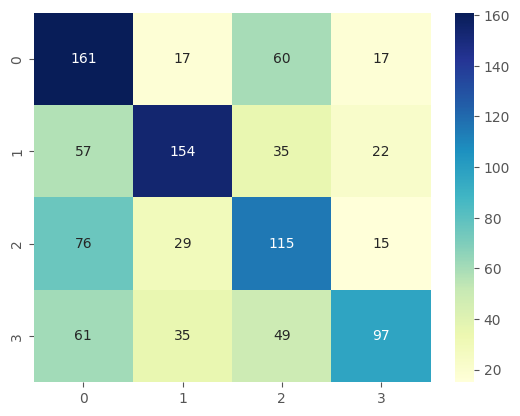

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test, batch_size=32)
Y_pred = Y_pred.argmax(axis=1)
Y_val = testY.argmax(axis=1)

conf_mat = confusion_matrix(Y_val, Y_pred)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

#### 7.3. Отобразим график обучения

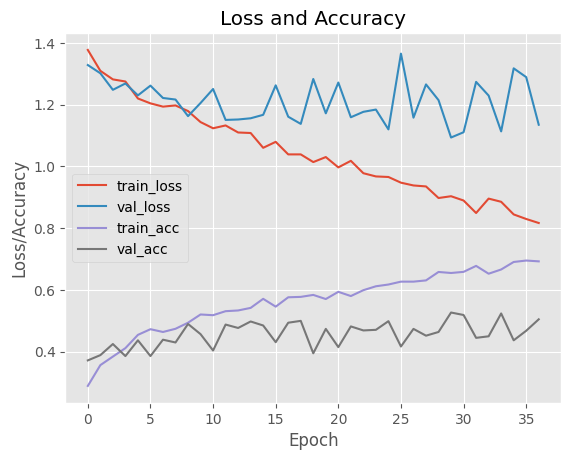

In [62]:
N = np.arange(0, 37)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, result.history["loss"], label="train_loss")
plt.plot(N, result.history["val_loss"], label="val_loss")
plt.plot(N, result.history["accuracy"], label="train_acc")
plt.plot(N, result.history["val_accuracy"], label="val_acc")
plt.title("Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

### 8. Сохранение модели и меток классов:

In [63]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    model.save(model_path, save_format="h5")

    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

model_path = "model.h5"
labels_path = "label_bin"

save_model_and_labels(model, unique_labels, model_path, labels_path)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [65]:
from keras.models import load_model
import gradio as gr
import pickle
import cv2
import numpy as np

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [66]:
def preprocess_image(img, compression_size=64):
    image = img.copy()
    image = cv2.resize(image, (compression_size, compression_size))
    image = image.astype("float32") / 255.0

    if len(image.shape) == 2:
        image = np.expand_dims(image, axis=-1)

    image = np.expand_dims(image, axis=0)

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [67]:
import pickle
from tensorflow.keras.models import load_model

def predict_image(img, preprocess_func = preprocess_image, model_path = "model.h5"):

    unique_labels = ['chicken', 'cow', 'dog', 'elephant']

    model = load_model(model_path)

    image = preprocess_func(img.copy())
    image = image.reshape((1, -1))
    preds = model.predict(image).flatten()

    confidences = {unique_labels[i]: float(preds[i]) for i in range(len(preds))}

    return confidences


### 10. Визуализируем интерфейс и произведем классификацию:

In [68]:
unique_labels = ['chicken', 'cow', 'dog', 'elephant']

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(label="Загрузите изображение"),
    outputs= gr.Label(num_top_classes=len(unique_labels)))

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://61c77874fac0241b04.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [69]:
predict_image(cv2.imread('/content/drive/MyDrive/test_data/OIP-__wtYf6sbvlOlMBMHyA3OAAAAA.jpeg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


{'chicken': 0.3936399817466736,
 'cow': 0.27114996314048767,
 'dog': 0.1328350305557251,
 'elephant': 0.20237508416175842}